## Libraries

First, you need to install the following librairies:
- [matplotlib](https://python-graph-gallery.com/matplotlib/) is used for plot creating the charts
- [pandas](https://python-graph-gallery.com/pandas/) is used to put the data into a dataframe
- `scikit-learn` is used to create the linear regression
- `numpy` is used to generate some data

The **linear regression** will be create using `scikit-learn`: install it using the `pip install -U scikit-learn` command

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

## Dataset

In this post, we'll use *fake weather data* about temperature and precipitation.

- We use the `random.normal()` and `random.uniform()` functions from **numpy** to generate data
- Then we use **pandas** to put these variables into a dataframe 

In [2]:
sample_size = 200
precipitation = np.random.uniform(10, 100, sample_size)
temperature = 2*precipitation + np.random.normal(10, 20, sample_size) 

df = pd.DataFrame({'temp': temperature,
                   'prec': precipitation})

## Get model parameters

First, we'll start by **retrive the values** we want. For this, we need to use the `LinearRegression()` object from `scikit-learn` and fit it to our data. 

*This post does not cover any statistical/math details*

In [3]:
# Define predictive and target variables
x = df['prec']
x = np.array(x).reshape((-1, 1)) # we need to work with a np array and to reshape it

y = df['temp']

# Create and fit model
model = LinearRegression()
model.fit(x, y)

LinearRegression()

Now that we have our model, let's get our coefficients and R squared!

In [4]:
r2 = model.score(x,y)
coefficients = model.coef_
intercept = model.intercept_

## Scatter plot with linear regression line

Now let's use the stats we got above and add them to the plot of [scatter plot](https://python-graph-gallery.com/scatter-plot/) of each group using the `text()` function from [matplotlib](https://python-graph-gallery.com/matplotlib/)

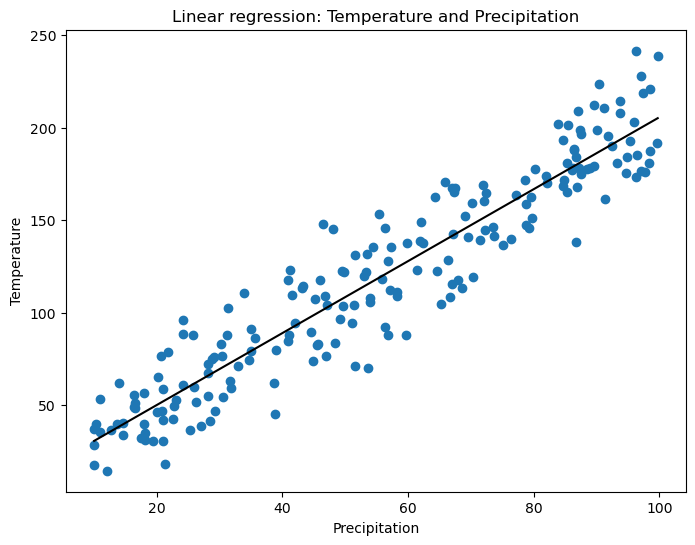

In [5]:
# Init plots
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(df['prec'], df['temp'])

# Define parameters of the regression line
num = len(df)
start = df['prec'].min()
end = df['prec'].max()
xseq = np.linspace(start, end, num=num)

# Plot the line
ax.plot(xseq, intercept+coefficients[0]*xseq, color="black", lw=1.5)

# Add a title and axis label
ax.set_title('Linear regression: Temperature and Precipitation')
ax.set_xlabel('Precipitation')
ax.set_ylabel('Temperature')

# Show the plot
plt.show()

## Scatter plot with estimated parameters

Now let's use the stats we got above and add them to the plot using the `text()` function from [matplotlib](https://python-graph-gallery.com/matplotlib/).

For example, to display the value of the **intercept** calculated by the model (usually called $\hat\beta_0$), we create a string `beta0`, which is the sum of a string written in `Latex` (part of the string between `$`) and the value of the calculated intercept rounded to 2 decimal places. 

And then we do the same thing for the **slope** and the **$R^2$**.

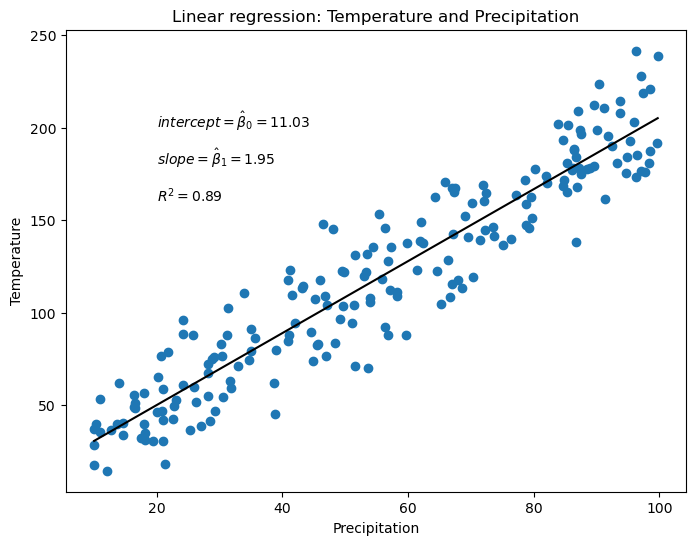

In [6]:
# Init plots
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(df['prec'], df['temp'])

# Define parameters of the regression line
num = len(df)
start = df['prec'].min()
end = df['prec'].max()
xseq = np.linspace(start, end, num=num)

# Plot the line
ax.plot(xseq, intercept+coefficients[0]*xseq, color="black", lw=1.5)

# Add the parameters
beta0 = r'$intercept = \hat\beta_0 =$' + str(round(intercept,2))
ax.text(20, 200, beta0, fontsize=10)

beta1 = r'$slope = \hat\beta_1 =$' + str(round(coefficients[0],2))
ax.text(20, 180, beta1, fontsize=10)

r_squared = r'$R^2 =$' + str(round(r2,2))
ax.text(20, 160, r_squared, fontsize=10)

# Add a title and axis label
ax.set_title('Linear regression: Temperature and Precipitation')
ax.set_xlabel('Precipitation')
ax.set_ylabel('Temperature')

# Show the plot
plt.show()

## Custom the chart and the slope

Using what we've just seen and other features, we're going to **customize our graphic** to make it even more aesthetic! 

- add `zorder` argument to the `scatter()` and `plot()` function to specify that markers should be **on top of the line**
- change color of the **markers** via the `color` argument
- put the text in **bold** using the `weight='bold'` argument
- **dash** the line with the `linestyle="--"` argument
- **remove** axis and spines
- **center** the texts with the `horizontalalignment='center'` argument

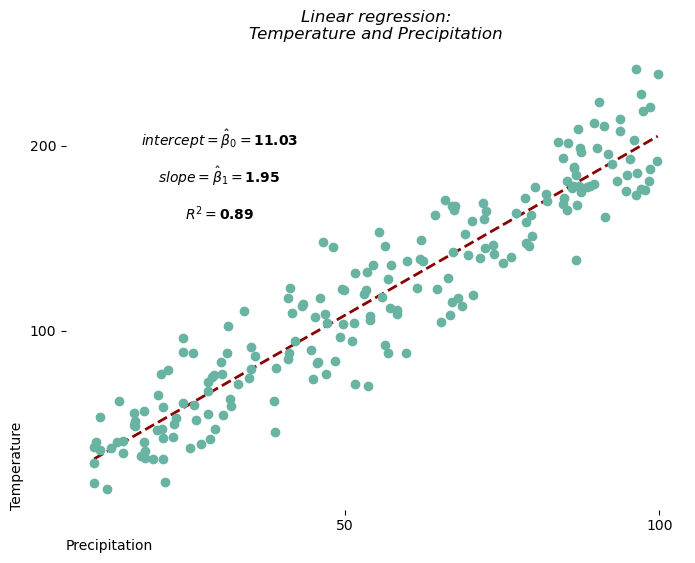

In [7]:
# Init plots
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(df['prec'], df['temp'],
           color='#69b3a2', zorder=2)

# Define parameters of the regression line
num = len(df)
start = df['prec'].min()
end = df['prec'].max()
xseq = np.linspace(start, end, num=num)

# Plot the line
ax.plot(xseq, intercept+coefficients[0]*xseq,
        color="darkred", lw=2, zorder=1, linestyle="--")

# Add the parameters
beta0 = r'$intercept = \hat\beta_0 =$' + str(round(intercept,2))
ax.text(30, 200, beta0, fontsize=10, weight='bold', horizontalalignment='center')

beta1 = r'$slope = \hat\beta_1 =$' + str(round(coefficients[0],2))
ax.text(30, 180, beta1, fontsize=10, weight='bold', horizontalalignment='center')

r_squared = r'$R^2 =$' + str(round(r2,2))
ax.text(30, 160, r_squared, fontsize=10, weight='bold', horizontalalignment='center')

# Remove axis labels
ax.set_xticks([50, 100])
ax.set_yticks([100, 200])

# Removes spines
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

# Add a title and axis label
ax.set_title('Linear regression:\nTemperature and Precipitation',
             style='italic')
ax.set_xlabel('Precipitation', loc='left')
ax.set_ylabel('Temperature', loc='bottom')

# Show the plot
plt.show()

## Going further

This post explains how to represent the **results of a linear regression** in a [scatter plot](https://python-graph-gallery.com/scatter-plot/).

For more examples of **charts with statistics**, see the [statistics section](https://python-graph-gallery.com/statistics/). You may also be interested in how to [create a highly cutomized scatter plot with regression](https://python-graph-gallery.com/web-scatterplot-text-annotation-and-regression-matplotlib/)